In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

# Simple Monte Carlo

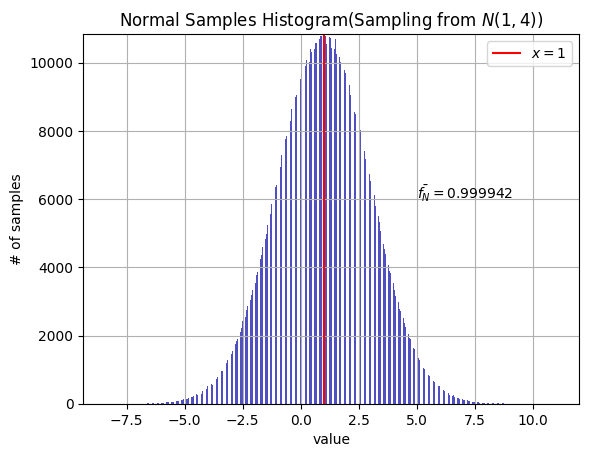

In [65]:
# Calculate the sample average
N = 1000000
iid_normals = lambda n:nr.normal(loc=1,scale=2,size=n)
Xs = iid_normals(N)
avg = Xs.mean()

# Histogram
n, bins, patches = plt.hist(x=Xs, bins='auto', color='#0504aa',
                            alpha=0.7,rwidth=.5)
plt.grid()
plt.xlabel('value')
plt.ylabel('# of samples')
plt.title(r'Normal Samples Histogram(Sampling from $N(1,4)$)')
plt.axvline(x=1,c='r',label=r'$x=1$')
plt.text(5,6000,r'$\bar{f_N}=$'+f'{avg:.6f}')
plt.ylim(ymax=n.max())
plt.legend()
plt.savefig('mc_sample_avg.pdf',format='pdf')
plt.show()

# Verification of the Weak Law of Large Numbers

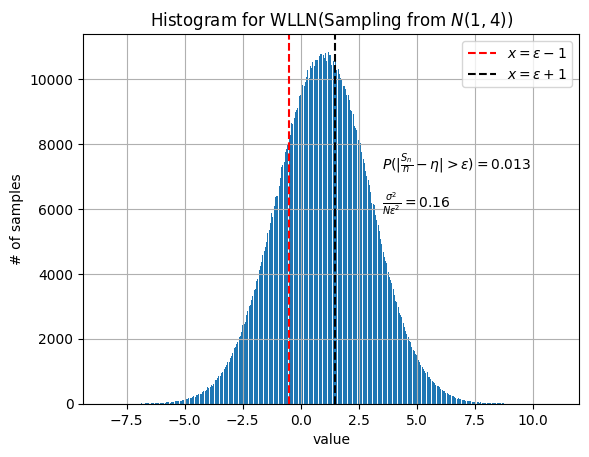

In [66]:
N_WLLN, N_expriments= 100,1000
epsilon = .5
experiments = np.array([abs(iid_normals(N_WLLN).mean()-1) for _ in range(N_expriments)])
P = (experiments>epsilon).mean()

n_wlln , bin , patches= plt.hist(Xs,bins='auto',rwidth=.8)
plt.grid()
plt.ylabel('# of samples')
plt.xlabel('value')
plt.title(r'Histogram for WLLN(Sampling from $N(1,4)$)')
plt.axvline(epsilon-1,c='r',label=r'$x=\epsilon-1$',linestyle='--')
plt.axvline(epsilon+1,c='black',label=r'$x=\epsilon+1$',linestyle='--')
plt.text(3.5,n_wlln.max()/1.5,r'$P(|\frac{S_n}{n}-\eta|>\epsilon)=$'+f'{P}')
plt.text(3.5,n_wlln.max()/1.8,r'$\frac{\sigma^2}{N\epsilon^2}=$'+f'{4/(N_WLLN*epsilon**2)}')
plt.legend()
plt.savefig('WLLN.pdf',format='pdf')
plt.show()

# Verification of Central Limit Therorem

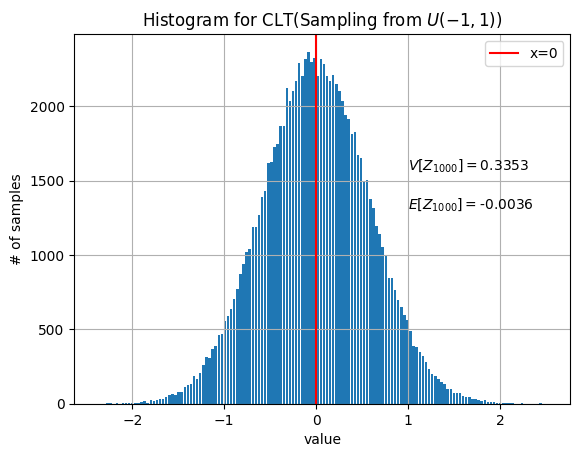

In [67]:
n_clt , n_expriments = 1000,100000
iid_uniform = lambda n:nr.uniform(-1,1,n)
Z = np.array([iid_uniform(n_clt).sum()/n_clt*n_clt**.5 for _ in range(n_expriments)])
n_clt , bin , patches= plt.hist(Z,bins='auto',rwidth=.8)
plt.grid()
plt.ylabel('# of samples')
plt.xlabel('value')
plt.title(r'Histogram for CLT(Sampling from $U(-1,1)$)')
plt.axvline(0,label='x=0',c='r')
plt.text(1,n_clt.max()/1.5,r'$V[Z_{1000}]=$'+f'{Z.var():.4f}')
plt.text(1,n_clt.max()/1.8,r'$E[Z_{1000}]=$'+f'{Z.mean():.4f}')
plt.legend()
plt.savefig('CLT.pdf',format='pdf')
plt.show()

# Verification of Concentration Inequality

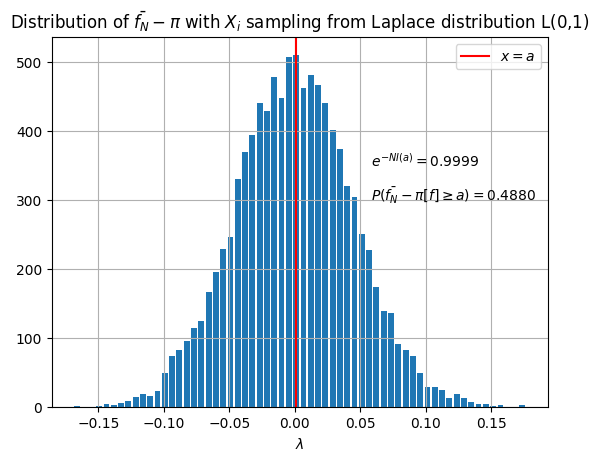

In [197]:
n_ci , n_expriments_ci = 1000,10000
a = .001
pi = 0

laplace = lambda n:nr.laplace(0,1,n)
f_Ns = np.array([laplace(n_ci).mean() for _ in range(n_expriments_ci)])
P = (f_Ns-pi>=a).mean()
I = lambda l:l*a-np.log(np.exp(-0)*np.exp(0)/(1-l**2))
l = np.linspace(0,.9,1000)
supI = I(l).max()
n_clt , bin , patches= plt.hist(f_Ns-pi,bins='auto',rwidth=.8)

plt.grid()
plt.title(r'Distribution of $\bar{f_N}-\pi$ with $X_i$ sampling from Laplace distribution L(0,1)')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'')
plt.axvline(a,label=r'$x=a$',c='r')
plt.text(.058,300,r'$P(\bar{f_N}-\pi [f]\geq a)=$'+f'{P:.4f}')
plt.text(.058,350,r'$e^{-NI(a)}=$'+f'{np.exp(-n_ci*supI):.4f}')


plt.legend()
plt.savefig('Concentration.pdf',format='pdf')
plt.show()